In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Youtube-Spam-Dataset.csv")
data.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [4]:
data[data.isnull().any(axis=1)]

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
1138,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,Eminem - Love The Way You Lie ft. Rihanna,1
1140,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",Eminem - Love The Way You Lie ft. Rihanna,1
1142,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,Eminem - Love The Way You Lie ft. Rihanna,1
1144,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,Eminem - Love The Way You Lie ft. Rihanna,1
1146,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistan﻿,Eminem - Love The Way You Lie ft. Rihanna,1
...,...,...,...,...,...,...
1578,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc,Ando Nesia - | MC | Music Producer,NaN,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,Eminem - Love The Way You Lie ft. Rihanna,1
1580,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI,the34104,NaN,check out eminem latest track survival if u didnt,Eminem - Love The Way You Lie ft. Rihanna,1
1581,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,Eminem - Love The Way You Lie ft. Rihanna,1
1582,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,Eminem - Love The Way You Lie ft. Rihanna,1


In [5]:
new_data = data.drop(["AUTHOR","DATE","COMMENT_ID","VIDEO_NAME"],axis=1)

In [6]:
new_data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [7]:
new_data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [8]:
new_data = new_data.drop_duplicates()

In [9]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import contractions
import nltk
import re

#Original comment
df = new_data[new_data['CLASS'] == 1]
comment,spam_class = df.iloc[6]

comment = comment.replace('\ufeff', '')

#Print original comment and spam class
print('-'*120)
print(f'Original Comment: {comment}')
print(f'Spam or not spam:','spam' if spam_class == 1 else 'not spam')

#Print the comment in lowercase
print('-'*120)
print(f'Lowered: {comment.lower()}')
print('-'*120)

#Tokenize the comment
tokenizer = TreebankWordTokenizer()
tokenized_comment = tokenizer.tokenize(comment)

#Print the tokenized comment
print(f'Tokenized: {tokenized_comment}')
print('-'*120)

#Stop word removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokenized_comment if word not in stop_words]

#Print the filtered tokens with stop words removed
print(f'Stop Word Removed: {filtered_tokens}')
print('-'*120)

#Remove Numerical values
filtered_comment = re.sub(r'\d+', '', comment) 

#Print the text with numerical values removed
print(f'Numeric Values Removed: {filtered_comment}')
print('-'*120)

#Remove Special Characters
cleaned_text = re.sub(r'[^\w\s]', '', comment)

#Print the text with special characters removed
print(f'Remove Special Characters: {cleaned_text}')
print('-'*120)

#Remove excess whitespace
comment_stripped = comment.strip()

#Print the text with excess whitespace removed
print(f'Excess whitespace removed {comment_stripped}')
print('-'*120)

#Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokenized_comment]

#Print the stemmed tokens
print(f'Stemmed: {stemmed_tokens}')
print('-'*120)

#Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokenized_comment]

#Print the lemmatized tokens
print(f"Lemmatization: {lemmatized_tokens}")
print('-'*120)

# Create a SpellChecker instance
spell = SpellChecker()
# Tokenize the text into words
# Identify misspelled words
misspelled = spell.unknown(tokenized_comment)
# Correct misspelled words
corrected_text = [spell.correction(word) if word in misspelled else word for word in tokenized_comment]
# Print the corrected text
print(f'Spelling Fix: {corrected_text}')
print('-'*120)

new_comment = [contractions.fix(word) for word in tokenized_comment]
    
#Print the expanded comment
print(f'Contractions Expanded: {new_comment}')
print('-'*120)

#Frequent words
word_freq = FreqDist(new_comment)
threshold=2
filtered_words = [word for word in tokenized_comment if word_freq[word] < threshold]

#Print the filtered words
print(f'Frequent Words: {filtered_words}')
print('-'*120)


------------------------------------------------------------------------------------------------------------------------
Original Comment: Subscribe to my channel 
Spam or not spam: spam
------------------------------------------------------------------------------------------------------------------------
Lowered: subscribe to my channel 
------------------------------------------------------------------------------------------------------------------------
Tokenized: ['Subscribe', 'to', 'my', 'channel']
------------------------------------------------------------------------------------------------------------------------
Stop Word Removed: ['Subscribe', 'channel']
------------------------------------------------------------------------------------------------------------------------
Numeric Values Removed: Subscribe to my channel 
------------------------------------------------------------------------------------------------------------------------
Remove Special Characters: Subscr

In [3]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import contractions
import emoji
import re

def is_full_width(text):
    # Check if any character in the text is a full-width character
    for char in text:
        if ord(char) >= 0xFF01 and ord(char) <= 0xFF5E:
            return True
    return False

def full_width_to_half_width(text):
    """Converts full-width characters to half-width."""
    return "".join(
        chr(ord(c) - 0xFEE0) if 0xFF01 <= ord(c) <= 0xFF5E else c for c in text
    )

#Steps for preprocessing the comment
def preprocess_comment(comment: str) -> str:
    if (is_full_width):
        comment = full_width_to_half_width(comment)

    #Change comment to lowercase
    lowercase_comment = comment.lower()

    #Replace websites or emails with url
    url_replaced_comment = re.sub(r'http\S+|www\S+|@\S+','url',lowercase_comment)

    #Change the emojis with the word
    emoji_replaced_comment = emoji.demojize(url_replaced_comment)

    #Remove the special characters
    special_char_removed_comment = re.sub(r'[^\w\s,]', '', emoji_replaced_comment)
    special_char_removed_comment = re.sub(r',',' ',special_char_removed_comment)

    #Remove the numbers in the comment
    number_removed_comment = re.sub(r'\d+', '', special_char_removed_comment) 

    #Remove the excess space
    space_removed_comment = number_removed_comment.strip()

    #Tokenize the comment
    tokenized_comment = tokenizer.tokenize(space_removed_comment)

    #Expand the contractions in the comment
    expand_contractions_comment = [contractions.fix(word) for word in tokenized_comment]

    #Remove the stopwords from the comment
    remove_stopwords_comment = [word for word in expand_contractions_comment if word not in stop_words]

    #Correct the spelling in the comment if any
    misspelled = spell.unknown(remove_stopwords_comment)
    corrected_text = [spell.correction(word) if word in misspelled else word for word in tokenized_comment]
    if (None in corrected_text or 'url' in misspelled):
        #Lemmatize the comment
        lemmatize_comment = [lemmatizer.lemmatize(word) for word in remove_stopwords_comment]
    else:
        lemmatize_comment = [lemmatizer.lemmatize(word) for word in corrected_text]

    #Change the comment from a list to string
    new_comment = " ".join(lemmatize_comment)
    return new_comment

import pandas as pd

new_data = pd.read_csv('Cleaned Youtube Comment Spam.csv')
df = new_data[new_data['CLASS'] == 1]

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = SpellChecker()

comment,spam_class = df.iloc[0]

new_comment = preprocess_comment(comment)

print('Spam class:',"Spam" if spam_class == 1 else 'Not Spam')
print(f'Original Comment: {comment}')
print(f'Preprocessed Comment: {new_comment}')


Spam class: Spam
Original Comment: Huh, anyway check out this you[tube] channel: kobyoshi02
Preprocessed Comment: huh anyway check youtube channel kobyoshi


In [11]:
new_data.loc[:,'CONTENT'] = new_data['CONTENT'].apply(preprocess_comment)

In [12]:
new_data.to_csv('Preprocessed Youtube Comment Data.csv',index=False)

In [13]:
processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace('',np.nan,inplace=True)
processed_data.dropna(inplace=True)
processed_data

,CONTENT,CLASS
0,huh anyway check youtube channel kobyoshi,1
1,hey guy check out my new channel and our first...,1
2,test say murdevcom,1
3,me shaking my sexy as on my channel enjoy _,1
4,watchvvtarggvgtwq check,1
...,...,...
1755,well done shaking,0
1756,i love this song because we sing it at camp al...,0
1757,i love this song for two reason it is about af...,0
1758,shaking u are so wired,0


In [14]:
spam_comments = processed_data[processed_data["CLASS"] == 1]
regular_comments = processed_data[processed_data["CLASS"] == 0]

In [15]:
new_spam_comments = spam_comments['CONTENT'].tolist()
new_spam_comments = [tokenizer.tokenize(comment) for comment in new_spam_comments]


In [16]:
from collections import Counter

spam_words = Counter()

for comment in new_spam_comments:
    spam_words += Counter(comment)

common_spam_words = pd.DataFrame(data = dict(spam_words).items(), columns = ['word', 'count']).sort_values(by = 'count', ascending = False).head(10)
common_spam_words

,word,count
2,check,377
9,my,274
55,i,254
47,to,237
24,please,228
11,and,225
29,subscribe,221
26,a,210
48,you,206
79,url,195


In [17]:
new_regular_comments = regular_comments['CONTENT'].tolist()
new_regular_comments = [tokenizer.tokenize(comment) for comment in new_regular_comments]



In [18]:
from collections import Counter

regular_words = Counter()

for comment in new_regular_comments:
    regular_words += Counter(comment)

common_regular_words = pd.DataFrame(data = dict(regular_words).items(), columns = ['word', 'count']).sort_values(by='count',ascending=False).head(10)
common_regular_words

,word,count
66,this,262
0,i,259
13,the,244
39,song,228
7,is,187
2,it,156
184,love,142
76,and,118
5,a,117
11,to,111


In [19]:
def is_full_width(text):
    # Check if any character in the text is a full-width character
    for char in text:
        if ord(char) >= 0xFF01 and ord(char) <= 0xFF5E:
            return True
    return False

for x in range(len(processed_data['CONTENT'].tolist())):
    if (is_full_width(processed_data.iloc[x]['CONTENT'])):
        print(x)

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data: a list of documents (comments)
comments = processed_data['CONTENT'].tolist()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the comments into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(comments)

# Convert the TF-IDF matrix to a DataFrame for better readability
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show the DataFrame
print(df_tfidf)

       __  __killuminati  _chris_cz  aaaaaaa  abbas  abele  ablaze  able  \
0     0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
1     0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
2     0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
3     0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
4     0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
...   ...            ...        ...      ...    ...    ...     ...   ...   
1750  0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
1751  0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
1752  0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
1753  0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   
1754  0.0            0.0        0.0      0.0    0.0    0.0     0.0   0.0   

      abominable  abomination  ...  yuliya  yum  zealous  zero  zesty  zip  \
0        

In [21]:
import numpy as np

# Set the number of top words to display per document
top_n = 3

# Get feature names (i.e., words) from the vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Find the top n words for each comment
top_words = []
for i in range(tfidf_matrix.shape[0]):
    sorted_indices = np.argsort(tfidf_matrix[i].toarray()[0])[::-1]  # Sort in descending order
    top_words.append(feature_names[sorted_indices[:top_n]])

# Display the top words for each comment
for idx, words in enumerate(top_words):
    print(f"Comment {idx+1}: {words}")

Comment 1: ['kobyoshi' 'huh' 'youtube']
Comment 2: ['monkey' 'shirt' 'white']
Comment 3: ['murdevcom' 'test' 'say']
Comment 4: ['enjoy' 'sexy' 'shaking']
Comment 5: ['watchvvtarggvgtwq' 'check' '강남스타일']
Comment 6: ['kidsmediausa' 'stuff' 'com']
Comment 7: ['channel' 'subscribe' 'gamestop']
Comment 8: ['mute' 'turned' 'wanted']
Comment 9: ['funny' 'channel' 'video']
Comment 10: ['tell' 'channel' 'check']
Comment 11: ['hey' 'subscribe' 'gameplay']
Comment 12: ['entire' 'stay' 'die']
Comment 13: ['url' 'gamestop' 'ganja']
Comment 14: ['comment' 'subscribe' 'like']
Comment 15: ['url' 'like' '강남스타일']
Comment 16: ['weve' 'experiment' 'scientific']
Comment 17: ['checking' 'im' 'view']
Comment 18: ['url' 'gamestop' 'ganja']
Comment 19: ['url' 'gamestop' 'ganja']
Comment 20: ['clothing' 'festival' 'apparel']
Comment 21: ['view' 'wanted' 'million']
Comment 22: ['people' 'channel' 'subscribe']
Comment 23: ['auburn' 'pride' 'url']
Comment 24: ['checking' 'just' 'view']
Comment 25: ['channel' 'chec

In [22]:
# Compute average TF-IDF scores for each word across all comments
average_tfidf_scores = np.mean(tfidf_matrix.toarray(), axis=0)

# Create a DataFrame for better readability
df_avg_tfidf = pd.DataFrame({
    'word': feature_names,
    'average_tfidf': average_tfidf_scores
})

# Sort by the average TF-IDF score in descending order
df_avg_tfidf_sorted = df_avg_tfidf.sort_values(by='average_tfidf', ascending=False)

# Display the top 10 words with the highest average TF-IDF score
print(df_avg_tfidf_sorted.head(10))

           word  average_tfidf
2943        url       0.049453
2568       song       0.047940
1643       love       0.043095
2678  subscribe       0.040814
424       check       0.039268
1578       like       0.035072
2973      video       0.032091
409     channel       0.031003
2981       view       0.020299
248        best       0.018715


In [23]:
df_tfidf.columns.tolist()

['__',
 '__killuminati',
 '_chris_cz',
 'aaaaaaa',
 'abbas',
 'abele',
 'ablaze',
 'able',
 'abominable',
 'abomination',
 'abonner',
 'absolute',
 'absolutely',
 'absorbing',
 'abuse',
 'abusedmistreated',
 'abusive',
 'acaer',
 'acceptance',
 'access',
 'accessory',
 'accidental',
 'accomplished',
 'account',
 'achieve',
 'achieved',
 'acidic',
 'acoustic',
 'acquire',
 'acquiring',
 'act',
 'acting',
 'activates',
 'active',
 'actor',
 'actress',
 'actual',
 'actually',
 'ad',
 'adam',
 'adapt',
 'add',
 'addfollow',
 'addicting',
 'adding',
 'addition',
 'adele',
 'adhoc',
 'admirable',
 'admire',
 'admit',
 'admitting',
 'adore',
 'adoult',
 'adult',
 'advance',
 'advertise',
 'advertisement',
 'advertisementsbr',
 'advertisiments',
 'advertising',
 'advice',
 'affiliated',
 'afflicted',
 'afford',
 'afraid',
 'africa',
 'african',
 'africanquot',
 'africaquot',
 'aftermath',
 'age',
 'ago',
 'agree',
 'agreeable',
 'ah',
 'ahead',
 'aid',
 'aiiima',
 'aim',
 'air',
 'airline',
 '

In [24]:

from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import contractions
import re

new_data = pd.read_csv('Cleaned Youtube Comment Spam.csv')

df = new_data[new_data['CLASS'] == 0]

comment,spam_class = df.iloc[12]

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = SpellChecker()

def preprocess_comment(comment: str) -> str:
    lowercase_comment = comment.lower()
    special_char_removed_comment = re.sub(r'[^\w\s,]', '', lowercase_comment)
    number_removed_comment = re.sub(r'\d+', '', special_char_removed_comment) 
    space_removed_comment = number_removed_comment.strip()
    tokenized_comment = tokenizer.tokenize(space_removed_comment)
    expand_contractions_comment = [contractions.fix(word) for word in tokenized_comment]
    remove_stopwords_comment = [word for word in expand_contractions_comment if word not in stop_words]
    lemmatize_comment = [lemmatizer.lemmatize(word) for word in remove_stopwords_comment]
    new_comment = " ".join(lemmatize_comment)
    return new_comment

new_comment = preprocess_comment(comment)

print('Spam class:',"Spam" if spam_class == 1 else 'Not Spam')
print(f'Original Comment: {comment}')
print(f'Preprocessed Comment: {new_comment}')

new_data[new_data['CLASS'] == 0].head(50)


Spam class: Not Spam
Original Comment: This video will get to 2 billion just because of people checking if it has  hit 2 billion yet.﻿
Preprocessed Comment: video get billion people checking hit billion yet


,CONTENT,CLASS
7,i turned it on mute as soon is i came on i jus...,0
16,I'm only checking the views﻿,0
20,i think about 100 millions of the views come f...,0
23,just checking the views﻿,0
28,I dont even watch it anymore i just come here ...,0
31,"Came here to check the views, goodbye.﻿",0
34,2 billion....Coming soon﻿,0
35,Why dafuq is a Korean song so big in the USA. ...,0
46,"now its 1,884,034,783 views! pls. comment the ...",0
48,go here to check the views :3﻿,0


In [3]:
processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)
spam_comments = processed_data[processed_data['CLASS'] == 1].shape[0]
regular_comments = processed_data[processed_data['CLASS'] == 0].shape[0]

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       188
           1       0.94      0.91      0.93       163

    accuracy                           0.93       351
   macro avg       0.93      0.93      0.93       351
weighted avg       0.93      0.93      0.93       351



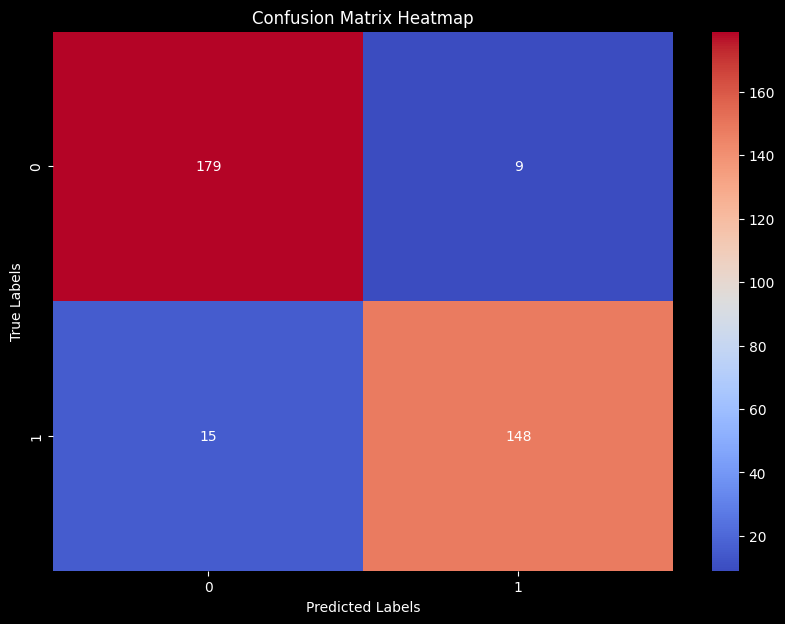

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)

df = processed_data
df = df.sample(frac=1)

X = df['CONTENT']
y = df['CLASS']

vectorizer = TfidfVectorizer() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [126]:
import joblib

accuracy = []
confusion_matrix = []

for x in range(10000):
    df = processed_data
    df = df.sample(frac=1).reset_index(drop=True)
    X = df['CONTENT']
    y = df['CLASS']
    vectorizer = TfidfVectorizer() 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy.append(current_accuracy)
    if (current_accuracy == max(accuracy)):
        joblib.dump(model, 'logistic_regression_model.joblib')
print(max(accuracy))


0.98005698005698


In [1]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)

accuracy = []
confusion_matrices_logistic = []

for x in range(100000):
    df = processed_data
    df = df.sample(frac=1).reset_index(drop=True)
    X = df['CONTENT']
    y = df['CLASS']
    
    vectorizer = TfidfVectorizer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test) 
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy.append(current_accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_logistic.append(cm)
    
    if current_accuracy == max(accuracy):
        report = classification_report(y_test, y_pred)
        print(f"Classification Report {x}:\n", report)
        joblib.dump(model, 'logistic_regression_model.joblib')
        joblib.dump(vectorizer, 'tfidf_vectorizer_logistic.joblib') 

accuracy = np.array(accuracy)

# Print the maximum accuracy achieved
print("Maximum Accuracy:", np.max(accuracy))
print("Average Accuracvy:",np.mean(accuracy))
print("Confusion Matrix",confusion_matrices_logistic[np.argmax(accuracy)])

Classification Report 0:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       190
           1       0.96      0.88      0.92       161

    accuracy                           0.93       351
   macro avg       0.93      0.93      0.93       351
weighted avg       0.93      0.93      0.93       351

Classification Report 1:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       184
           1       0.96      0.91      0.93       167

    accuracy                           0.94       351
   macro avg       0.94      0.94      0.94       351
weighted avg       0.94      0.94      0.94       351

Classification Report 6:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       192
           1       0.97      0.90      0.93       159

    accuracy                           0.94       351
   macro avg       0.94      0.94      0.94       

In [2]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)

accuracy = []
confusion_matrices_naive = []

for x in range(100000):
    df = processed_data
    df = df.sample(frac=1).reset_index(drop=True)
    X = df['CONTENT']
    y = df['CLASS']
    
    vectorizer = TfidfVectorizer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test) 
    
    NBmodel = MultinomialNB()
    NBmodel.fit(X_train, y_train)

    y_pred = NBmodel.predict(X_test)
    
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy.append(current_accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_naive.append(cm)
    
    if current_accuracy == max(accuracy):
        report = classification_report(y_test, y_pred)
        print(f"Classification Report {x}:\n", report)
        joblib.dump(NBmodel, 'NBModel.joblib')
        joblib.dump(vectorizer, 'tfidf_vectorizer_NB.joblib') 

accuracy = np.array(accuracy)

# Print the maximum accuracy achieved
print("Maximum Accuracy:", np.max(accuracy))
print("Average Accuracvy:",np.mean(accuracy))
print("Confusion Matrix",confusion_matrices_naive[np.argmax(accuracy)])

Classification Report 0:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       172
           1       0.93      0.85      0.89       179

    accuracy                           0.89       351
   macro avg       0.89      0.89      0.89       351
weighted avg       0.89      0.89      0.89       351

Classification Report 1:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       193
           1       0.92      0.95      0.93       158

    accuracy                           0.94       351
   macro avg       0.94      0.94      0.94       351
weighted avg       0.94      0.94      0.94       351

Classification Report 3:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       181
           1       0.95      0.92      0.94       170

    accuracy                           0.94       351
   macro avg       0.94      0.94      0.94       

In [4]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)

accuracy = []
confusion_matrices_svc = []

for x in range(100000):
    df = processed_data
    df = df.sample(frac=1).reset_index(drop=True)
    X = df['CONTENT']
    y = df['CLASS']
    
    vectorizer = TfidfVectorizer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test) 
    
    model = SVC(kernel='linear')
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy.append(current_accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_svc.append(cm)
    
    if current_accuracy == max(accuracy):
        report = classification_report(y_test, y_pred)
        print(f"Classification Report {x}:\n", report)
        joblib.dump(model, 'SVC.joblib')
        joblib.dump(vectorizer, 'tfidf_vectorizer_SVC.joblib') 

accuracy = np.array(accuracy)

# Print the maximum accuracy achieved
print("Maximum Accuracy:", np.max(accuracy))
print("Average Accuracvy:",np.mean(accuracy))
print("Confusion Matrix",confusion_matrices_svc[np.argmax(accuracy)])

Classification Report 0:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       199
           1       0.95      0.92      0.93       152

    accuracy                           0.94       351
   macro avg       0.94      0.94      0.94       351
weighted avg       0.94      0.94      0.94       351

Classification Report 3:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       192
           1       0.97      0.92      0.94       159

    accuracy                           0.95       351
   macro avg       0.95      0.95      0.95       351
weighted avg       0.95      0.95      0.95       351

Classification Report 4:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       198
           1       0.95      0.94      0.94       153

    accuracy                           0.95       351
   macro avg       0.95      0.95      0.95       

In [5]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

processed_data = pd.read_csv('Preprocessed Youtube Comment Data.csv')
processed_data.replace(to_replace = ' ', value = np.nan, inplace = True)
processed_data.dropna(inplace = True)

accuracy = []
confusion_matrices_linearsvc = []

for x in range(100000):
    df = processed_data
    df = df.sample(frac=1).reset_index(drop=True)
    X = df['CONTENT']
    y = df['CLASS']
    
    vectorizer = TfidfVectorizer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test) 
    
    model = LinearSVC()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    
    current_accuracy = accuracy_score(y_test, y_pred)
    accuracy.append(current_accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_linearsvc.append(cm)
    
    if current_accuracy == max(accuracy):
        report = classification_report(y_test, y_pred)
        print(f"Classification Report {x}:\n", report)
        joblib.dump(model, 'LinearSVC.joblib')
        joblib.dump(vectorizer, 'tfidf_vectorizer_LinearSVC.joblib') 

accuracy = np.array(accuracy)

# Print the maximum accuracy achieved
print("Maximum Accuracy:", np.max(accuracy))
print("Average Accuracvy:",np.mean(accuracy))
print("Confusion Matrix",confusion_matrices_linearsvc[np.argmax(accuracy)])

Classification Report 0:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       175
           1       0.97      0.89      0.93       176

    accuracy                           0.93       351
   macro avg       0.93      0.93      0.93       351
weighted avg       0.93      0.93      0.93       351

Classification Report 2:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       177
           1       0.96      0.94      0.95       174

    accuracy                           0.95       351
   macro avg       0.95      0.95      0.95       351
weighted avg       0.95      0.95      0.95       351

Classification Report 7:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       182
           1       0.97      0.94      0.95       169

    accuracy                           0.96       351
   macro avg       0.96      0.96      0.96       

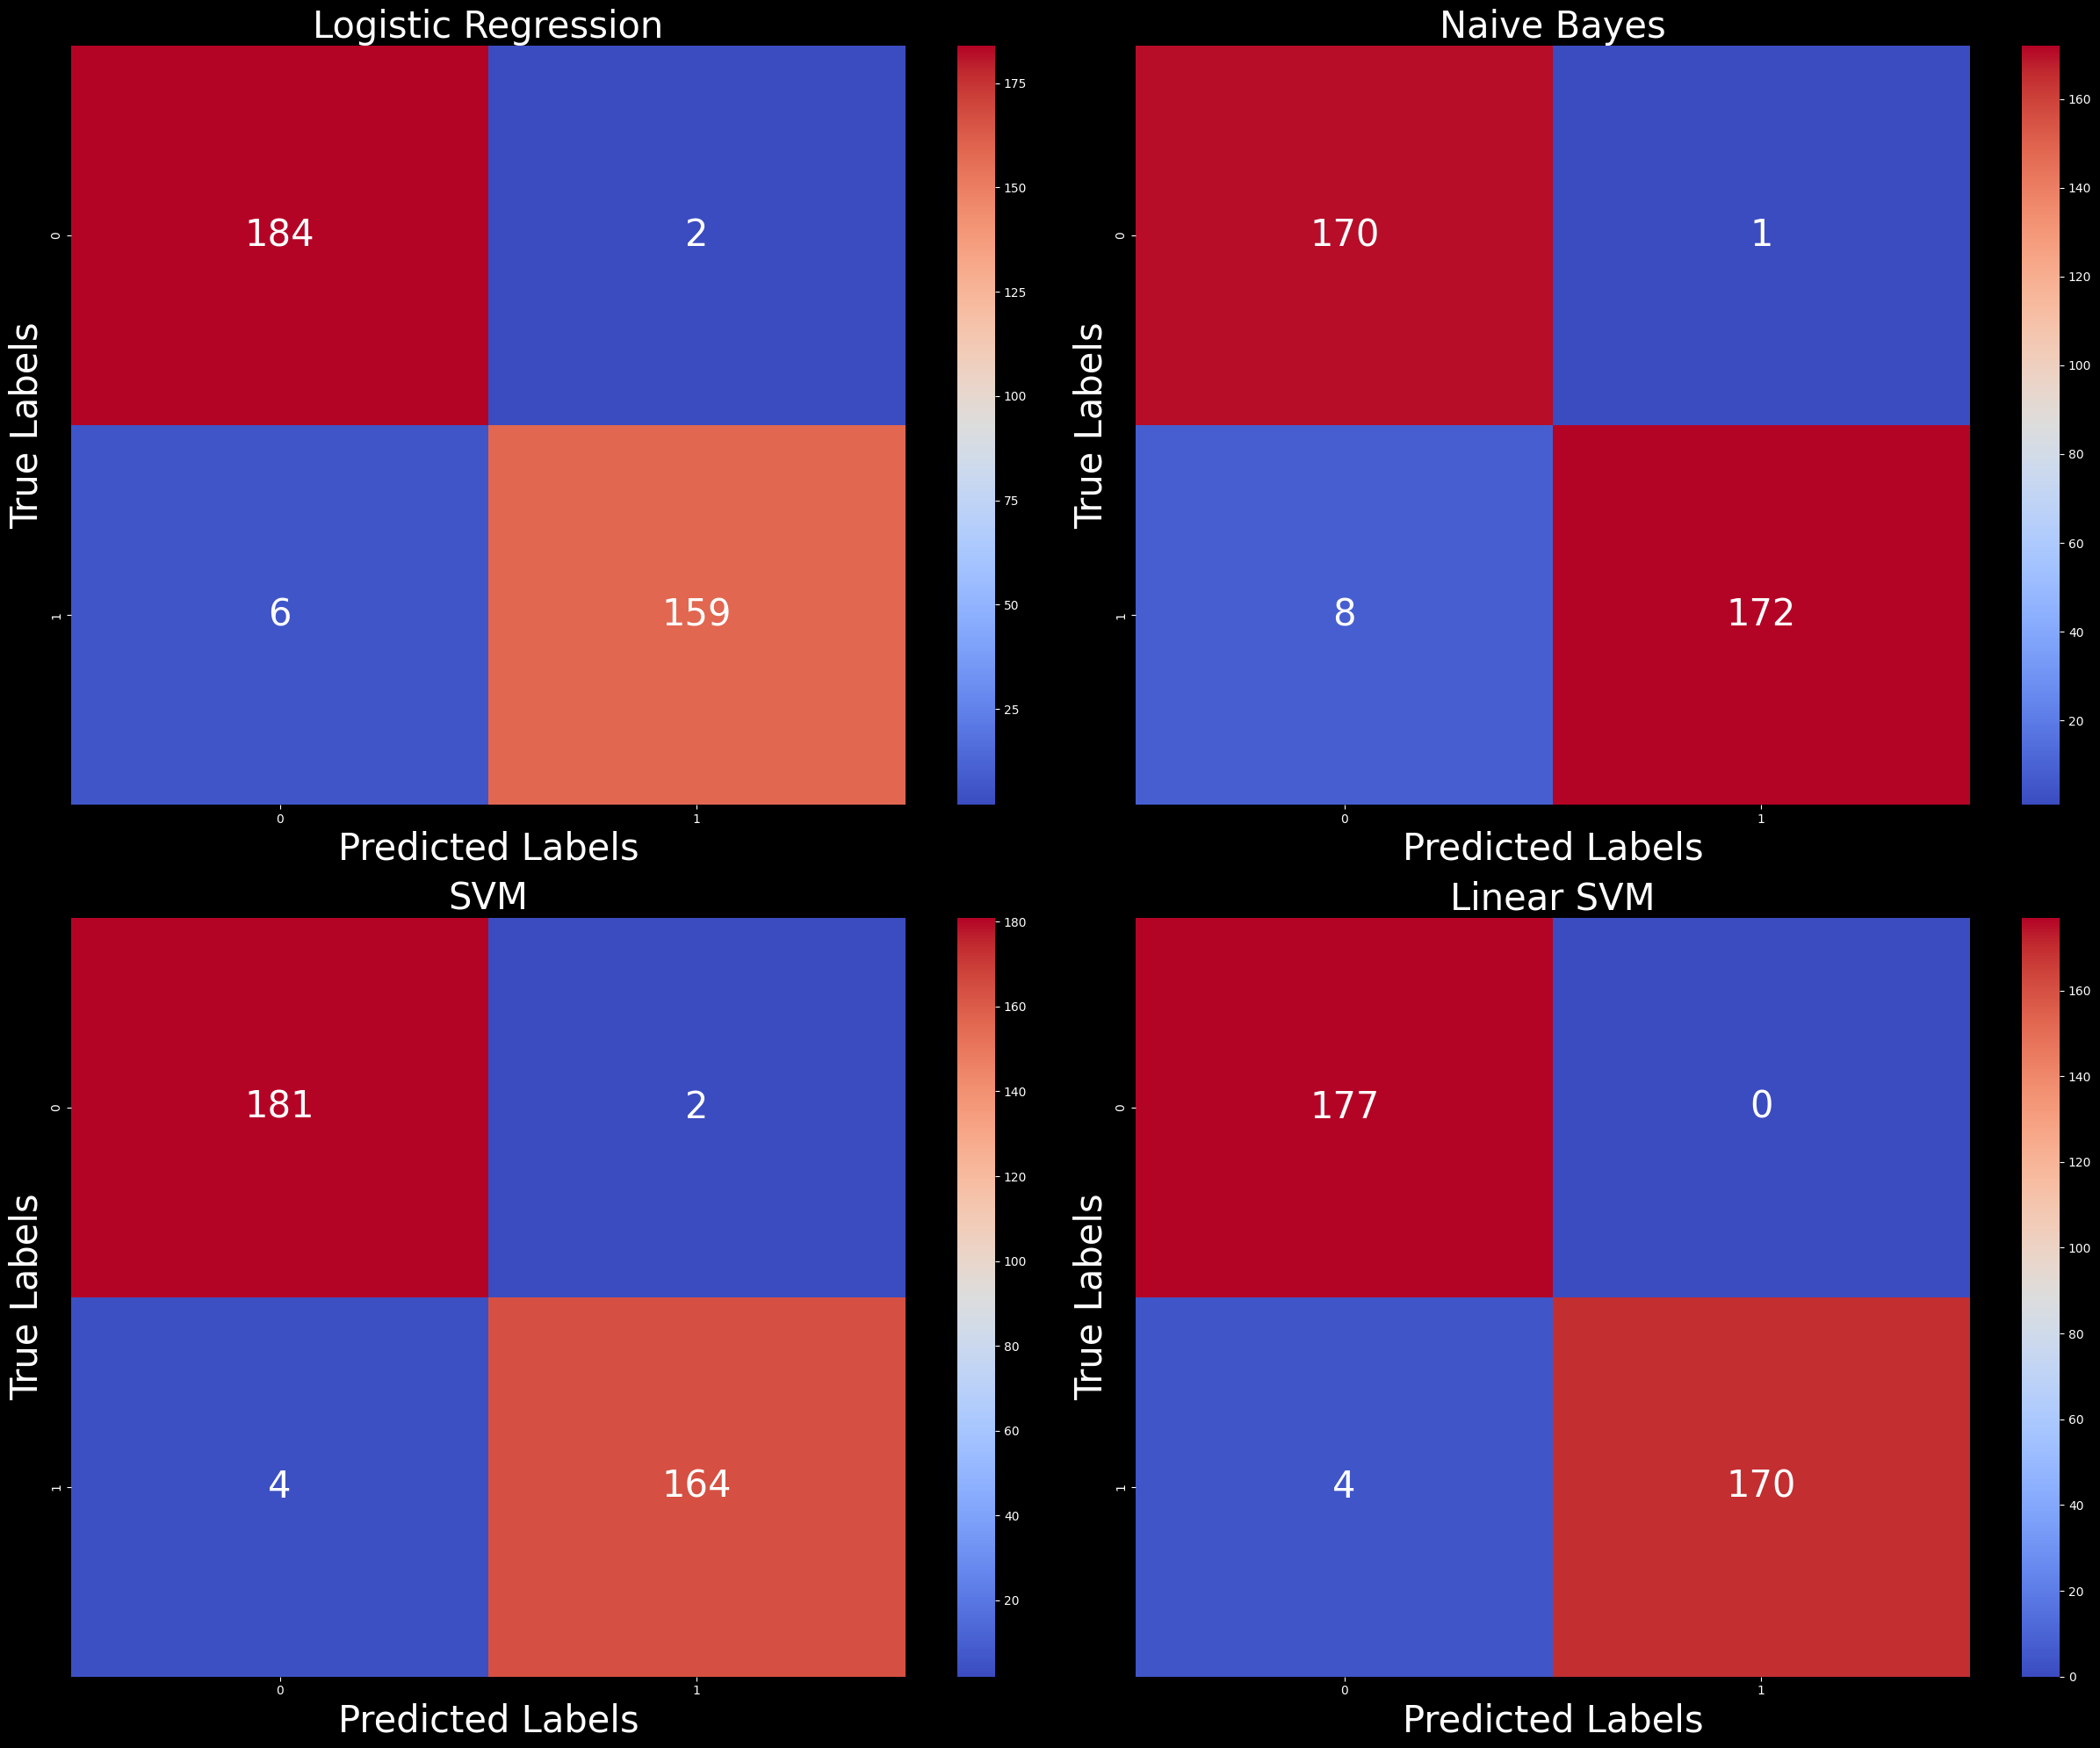

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrices_logistic = [[184,2],[6,159]]
confusion_matrices_naive = [[170,1],[8,172]]
confusion_matrices_svm = [[181,2],[4,164]]
confusion_matrices_linearsvc = [[177,0],[4,170]]

fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(25, 20))
sns.heatmap(confusion_matrices_logistic,annot=True,fmt='d',cmap='coolwarm',ax=ax[0][0],annot_kws={"size": 30})
ax[0][0].set_title('Logistic Regression',fontsize=30)
ax[0][0].set_xlabel('Predicted Labels',fontsize=30)
ax[0][0].set_ylabel('True Labels',fontsize=30)
sns.heatmap(confusion_matrices_naive,annot=True,fmt='d',cmap='coolwarm',ax=ax[0][1],annot_kws={"size": 30})
ax[0][1].set_title('Naive Bayes',fontsize=30)
ax[0][1].set_xlabel('Predicted Labels',fontsize=30)
ax[0][1].set_ylabel('True Labels',fontsize=30)
sns.heatmap(confusion_matrices_svm,annot=True,fmt='d',cmap='coolwarm',ax=ax[1][0],annot_kws={"size": 30})
ax[1][0].set_title('SVM',fontsize=30)
ax[1][0].set_xlabel('Predicted Labels',fontsize=30)
ax[1][0].set_ylabel('True Labels',fontsize=30)
sns.heatmap(confusion_matrices_linearsvc,annot=True,fmt='d',cmap='coolwarm',ax=ax[1][1],annot_kws={"size": 30})
ax[1][1].set_title('Linear SVM',fontsize=30)
ax[1][1].set_xlabel('Predicted Labels',fontsize=30)
ax[1][1].set_ylabel('True Labels',fontsize=30)

plt.tight_layout()